# Setup environment

Install `python-dotenv` to read from .env file

In [ ]:
!pip install python-dotenv

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_PATH = "/content/drive/MyDrive/Kandidatarbete - AI/modeller"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Check if GPU-accel works

In [ ]:
!nvidia-smi

Tue Mar 28 09:12:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install dependencies

Install ultralytics to access YOLOv8 models

In [ ]:
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


## Datasets

Get the datasets from Roboflow

In [ ]:
!pip install roboflow
!mkdir -p datasets

from roboflow import Roboflow
rf = Roboflow(api_key="<API-KEY>")
project = rf.workspace("yolo-6y5cv").project("chair-scratches")
dataset = project.version(1).download("yolov8")

!mv Chair-scratches* datasets/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Chair-scratches-1 in yolov8:: 100%|██████████| 214/214 [00:00<00:00, 567.74it/s]


## Setup matplotlib for visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('classic')


image 1/1 /content/test-stol.jpg: 640x480 1 screw, 13.3ms
Speed: 0.5ms preprocess, 13.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


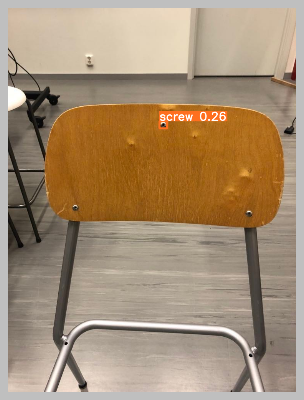

In [ ]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import cv2

model_path = f'{DRIVE_PATH}/820epochs-train27/weights/best.pt'
model = YOLO(model_path)

img_url =  "/content/test-stol.jpg"

results = model(img_url)
res_plotted = results[0].plot(show_conf=True)

# Convert image to BGR colorspace
image_bgr = cv2.cvtColor(res_plotted, cv2.COLOR_RGB2BGR)

plt.imshow(image_bgr)
plt.axis("off")
plt.show()


## Validation

In [ ]:
# load the model
model = YOLO('/content/drive/MyDrive/Kandidatarbete - AI/train2/weights/best.pt')

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category


Ultralytics YOLOv8.0.58 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Chair-scratches-1/valid/labels.cache... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]
                   all         20        101      0.528      0.488      0.486      0.227
                  chip         20         43      0.707      0.488      0.542      0.186
             scratches         20         19          0          0     0.0194    0.00714
                 screw         20         39      0.878      0.974      0.898      0.489
Speed: 0.3ms preprocess, 19.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


array([    0.18643,   0.0071359,     0.48862])

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="<API-KEY>")
project = rf.workspace().project("chair-scratches")
model = project.version(1).model

# infer on a local image
print(model.predict("/content/test-stol.jpg", confidence=40, overlap=30).json())

# visualize your prediction
# model.predict("your_image.jpg", confidence=40, overlap=30).save("prediction.jpg")

# infer on an image hosted elsewhere
# print(model.predict("URL_OF_YOUR_IMAGE", hosted=True, confidence=40, overlap=30).json())